<a href="https://colab.research.google.com/github/bonareri/Python-Data-Analysis/blob/main/Life_Expectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px
import missingno as msno
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
life_expectancy = pd.read_csv('/content/Life Expectancy Data.csv')
life_expectancy.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
# Convert 'Year' column to datetime, setting January 1st as the default date for each year
life_expectancy['Year'] = pd.to_datetime(life_expectancy['Year'], format='%Y')

# Check the data type to ensure it's converted correctly
print(life_expectancy['Year'].head())
print(life_expectancy.dtypes)


0   2015-01-01
1   2014-01-01
2   2013-01-01
3   2012-01-01
4   2011-01-01
Name: Year, dtype: datetime64[ns]
Country                                    object
Year                               datetime64[ns]
Status                                     object
Life expectancy                           float64
Adult Mortality                           float64
infant deaths                               int64
Alcohol                                   float64
percentage expenditure                    float64
Hepatitis B                               float64
Measles                                     int64
 BMI                                      float64
under-five deaths                           int64
Polio                                     float64
Total expenditure                         float64
Diphtheria                                float64
 HIV/AIDS                                 float64
GDP                                       float64
Population                               

In [14]:
life_expectancy.columns = life_expectancy.columns.str.strip()

In [16]:
life_expectancy.isnull().sum()


,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [30]:
#percentage of missing values
life_expectancy.isnull().sum()/life_expectancy.shape[0]*100

,0
Country,0.000000
Year,0.000000
Status,0.000000
Life expectancy,0.000000
Adult Mortality,0.000000
infant deaths,0.000000
Alcohol,0.000000
percentage expenditure,0.000000
Hepatitis B,0.000000
Measles,0.000000


<Axes: >

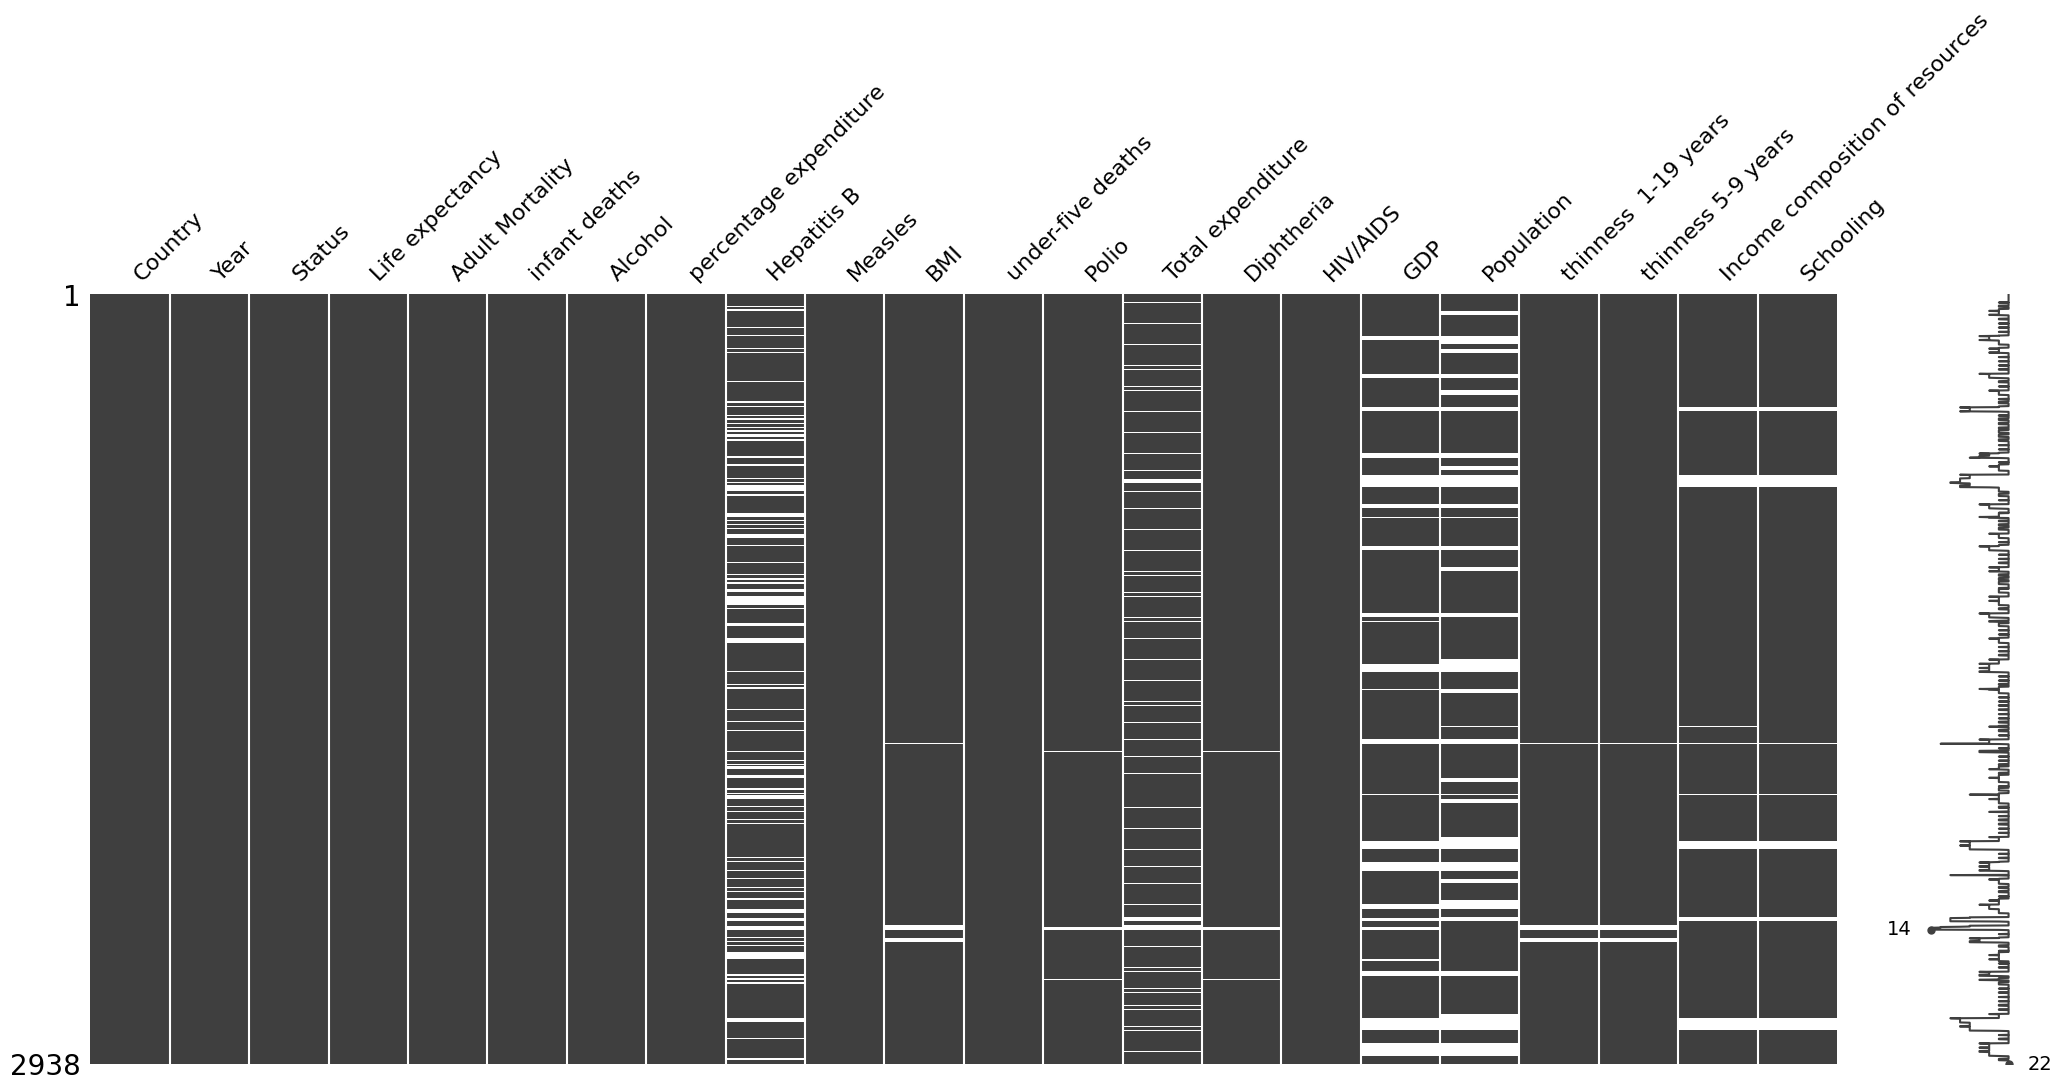

In [21]:
msno.matrix(life_expectancy)

## K-Nearest Neighbors (KNN) Imputation

In [15]:
# Filling in Life expectancy and Adult Mortality which have related missing values using
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
life_expectancy[['Life expectancy', 'Adult Mortality']] = imputer.fit_transform(life_expectancy[['Life expectancy', 'Adult Mortality']])


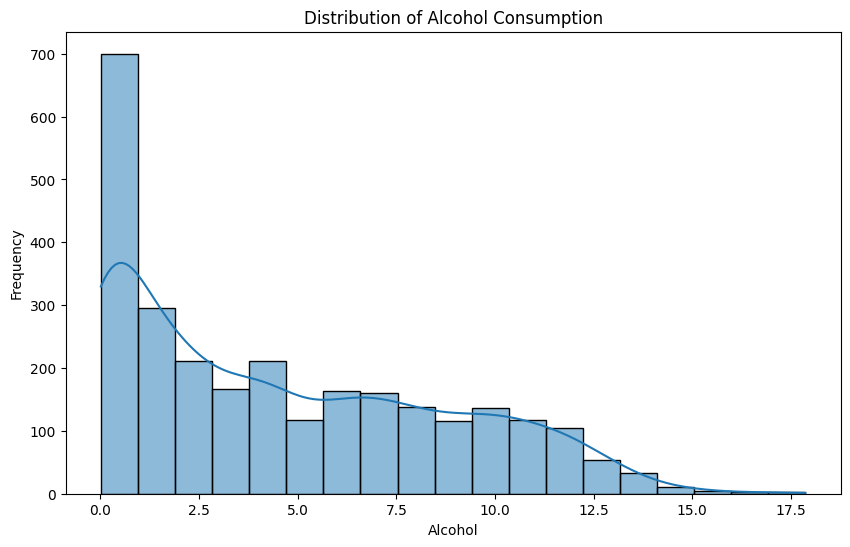

In [18]:
#distribution of values in the Alcohol column
plt.figure(figsize=(10, 6))
sns.histplot(life_expectancy['Alcohol'], kde=True)
plt.title('Distribution of Alcohol Consumption')
plt.xlabel('Alcohol')
plt.ylabel('Frequency')
plt.show()


In [19]:
median_value = life_expectancy['Alcohol'].median()
life_expectancy['Alcohol'].fillna(median_value, inplace=True)

<ipython-input-19-1637ed5b7099>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  life_expectancy['Alcohol'].fillna(median_value, inplace=True)


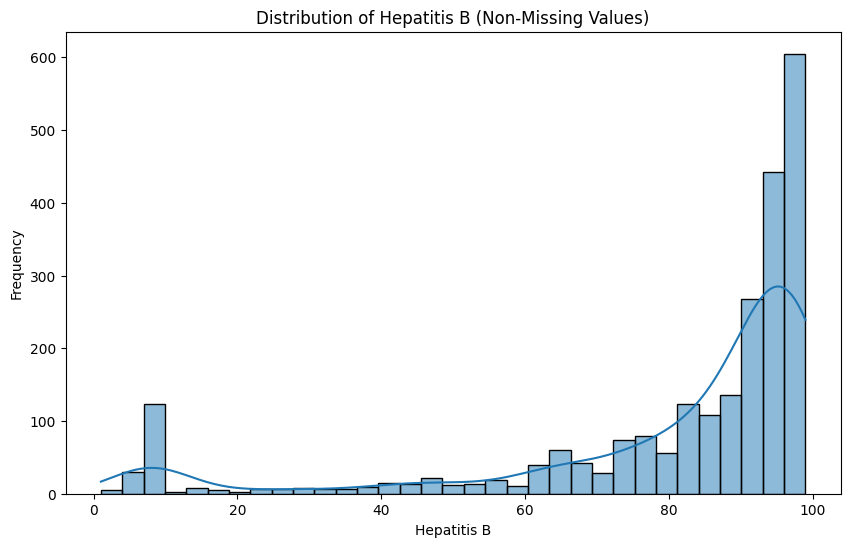

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(life_expectancy[life_expectancy['Hepatitis B'].notnull()]['Hepatitis B'], kde=True)
plt.title('Distribution of Hepatitis B (Non-Missing Values)')
plt.xlabel('Hepatitis B')
plt.ylabel('Frequency')
plt.show()


In [23]:
# Fill missing values in the 'Hepatitis B' column with the median
life_expectancy['Hepatitis B'].fillna(life_expectancy['Hepatitis B'].median(), inplace=True)

<ipython-input-23-da62193fa619>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  life_expectancy['Hepatitis B'].fillna(life_expectancy['Hepatitis B'].median(), inplace=True)


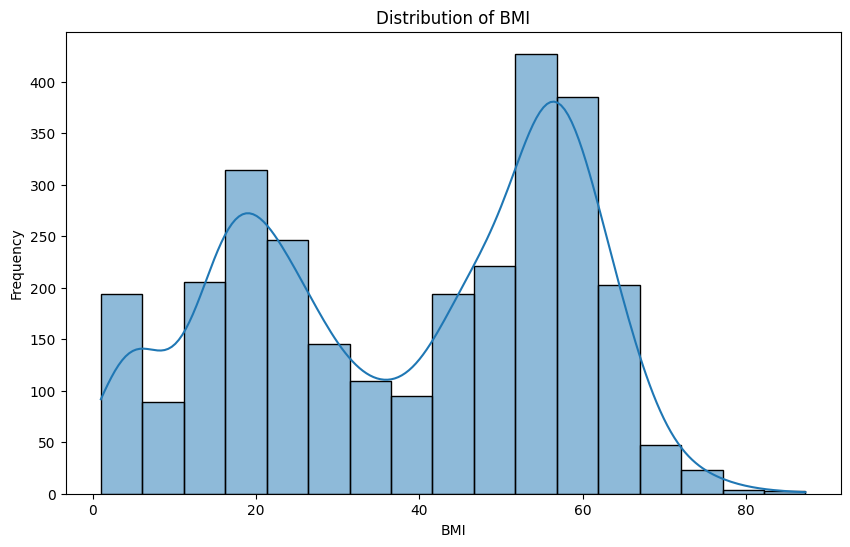

In [25]:
#distribution of values in the BMI column
plt.figure(figsize=(10, 6))
sns.histplot(life_expectancy['BMI'], kde=True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

##Impute Missing Values for BMI (Considering Bimodal Distribution)

In [29]:
from sklearn.impute import KNNImputer

# Initialize the KNN imputer with n_neighbors set to 5
imputer = KNNImputer(n_neighbors=5)

# Select columns for KNN imputation
columns_to_impute = ['Polio', 'Total expenditure', 'Diphtheria']

# Apply KNN imputation
life_expectancy[columns_to_impute] = imputer.fit_transform(life_expectancy[columns_to_impute])

# Verify the imputation
print(life_expectancy[columns_to_impute].isnull().sum())


Polio                0
Total expenditure    0
Diphtheria           0
dtype: int64


In [31]:
#Filling in missing values for the GDP and Population columns which are related

# Initialize the KNN imputer with n_neighbors set to 5
imputer = KNNImputer(n_neighbors=5)

# Select the columns for KNN imputation
columns_to_impute = ['GDP', 'Population']

# Apply KNN imputation
life_expectancy[columns_to_impute] = imputer.fit_transform(life_expectancy[columns_to_impute])

# Verify the imputation
print(life_expectancy[columns_to_impute].isnull().sum())


GDP           0
Population    0
dtype: int64


In [33]:
print(life_expectancy.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


In [34]:
# Remove leading/trailing spaces from column names
life_expectancy.columns = life_expectancy.columns.str.strip()

# Verify the cleaned column names
print(life_expectancy.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


In [36]:
# Print all column names to inspect them carefully
print(life_expectancy.columns.tolist())


['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [41]:
# Strip extra spaces from column names
life_expectancy.columns = life_expectancy.columns.str.strip()

# Check column names again after cleaning
print(life_expectancy.columns.tolist())


['Country', 'Year', 'Status', 'Lifeexpectancy', 'AdultMortality', 'infantdeaths', 'Alcohol', 'percentageexpenditure', 'HepatitisB', 'Measles', 'BMI', 'under-fivedeaths', 'Polio', 'Totalexpenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness1-19years', 'thinness5-9years', 'Incomecompositionofresources', 'Schooling']


In [42]:
from sklearn.impute import KNNImputer

# Initialize the KNN imputer
imputer = KNNImputer(n_neighbors=5)

# Apply KNN imputation for the 'thinness1-19years' and 'thinness5-9years' columns
life_expectancy[['thinness1-19years', 'thinness5-9years']] = imputer.fit_transform(life_expectancy[['thinness1-19years', 'thinness5-9years']])

# Verify if missing values have been imputed
print(life_expectancy[['thinness1-19years', 'thinness5-9years']].isnull().sum())

thinness1-19years    0
thinness5-9years     0
dtype: int64


In [44]:
life_expectancy.isnull().sum()

,0
Country,0
Year,0
Status,0
Lifeexpectancy,0
AdultMortality,0
infantdeaths,0
Alcohol,0
percentageexpenditure,0
HepatitisB,0
Measles,0


##KNN Imputation for Income and Schooling

In [47]:
# Clean column names by stripping any extra spaces
life_expectancy.columns = life_expectancy.columns.str.strip()
life_expectancy.columns

Index(['Country', 'Year', 'Status', 'Lifeexpectancy', 'AdultMortality',
       'infantdeaths', 'Alcohol', 'percentageexpenditure', 'HepatitisB',
       'Measles', 'BMI', 'under-fivedeaths', 'Polio', 'Totalexpenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness1-19years',
       'thinness5-9years', 'Incomecompositionofresources', 'Schooling'],
      dtype='object')

In [48]:
from sklearn.impute import KNNImputer

# Initialize the KNN imputer
imputer = KNNImputer(n_neighbors=5)

# Apply KNN imputation for 'Incomecompositionofresources' and 'Schooling'
life_expectancy[['Incomecompositionofresources', 'Schooling']] = imputer.fit_transform(life_expectancy[['Incomecompositionofresources', 'Schooling']])

# Verify if missing values have been imputed
print(life_expectancy[['Incomecompositionofresources', 'Schooling']].isnull().sum())


Incomecompositionofresources    0
Schooling                       0
dtype: int64


In [49]:
life_expectancy.isnull().sum()

,0
Country,0
Year,0
Status,0
Lifeexpectancy,0
AdultMortality,0
infantdeaths,0
Alcohol,0
percentageexpenditure,0
HepatitisB,0
Measles,0


#Exploratory Data Analysis (EDA)

In [51]:
#Statistical Summary
life_expectancy.describe()

,Year,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
count,2938,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007-07-09 14:07:55.425459456,69.224932,164.796448,30.303948,4.546875,738.251295,83.022124,2419.592240,38.321247,42.035739,82.546988,5.942535,82.326537,1.742103,7478.865648,1.262869e+07,4.839704,4.870317,0.627108,11.992793
min,2000-01-01 00:00:00,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004-01-01 00:00:00,63.200000,74.000000,0.000000,1.092500,4.685343,82.000000,0.000000,19.400000,0.000000,78.000000,4.320000,78.000000,0.100000,579.507175,3.978545e+05,1.600000,1.600000,0.504000,10.300000
50%,2008-01-01 00:00:00,72.000000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.000000,4.000000,93.000000,5.805000,93.000000,0.100000,2990.096266,2.956390e+06,3.400000,3.400000,0.662000,12.100000
75%,2012-01-01 00:00:00,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.430000,97.000000,0.800000,7483.158469,1.275338e+07,7.100000,7.200000,0.772750,14.100000
max,2015-01-01 00:00:00,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000
std,NaN,9.507640,124.080302,117.926501,3.921946,1987.914858,22.996984,11467.272489,19.927677,160.445548,23.372791,2.429562,23.651590,5.077785,13148.607368,5.410912e+07,4.394535,4.482708,0.205543,3.264381


##  Correlation
Relationships between numerical variables using correlation.

                              Lifeexpectancy  AdultMortality  infantdeaths  \
Lifeexpectancy                      1.000000       -0.696359     -0.196535   
AdultMortality                     -0.696359        1.000000      0.078747   
infantdeaths                       -0.196535        0.078747      1.000000   
Alcohol                             0.389847       -0.190681     -0.112918   
percentageexpenditure               0.381791       -0.242814     -0.085612   
HepatitisB                          0.170555       -0.123464     -0.167421   
Measles                            -0.157574        0.031174      0.501128   
BMI                                 0.559255       -0.381449     -0.227220   
under-fivedeaths                   -0.222503        0.094135      0.996629   
Polio                               0.462140       -0.273176     -0.170505   
Totalexpenditure                    0.216349       -0.115965     -0.130480   
Diphtheria                          0.475888       -0.273384    

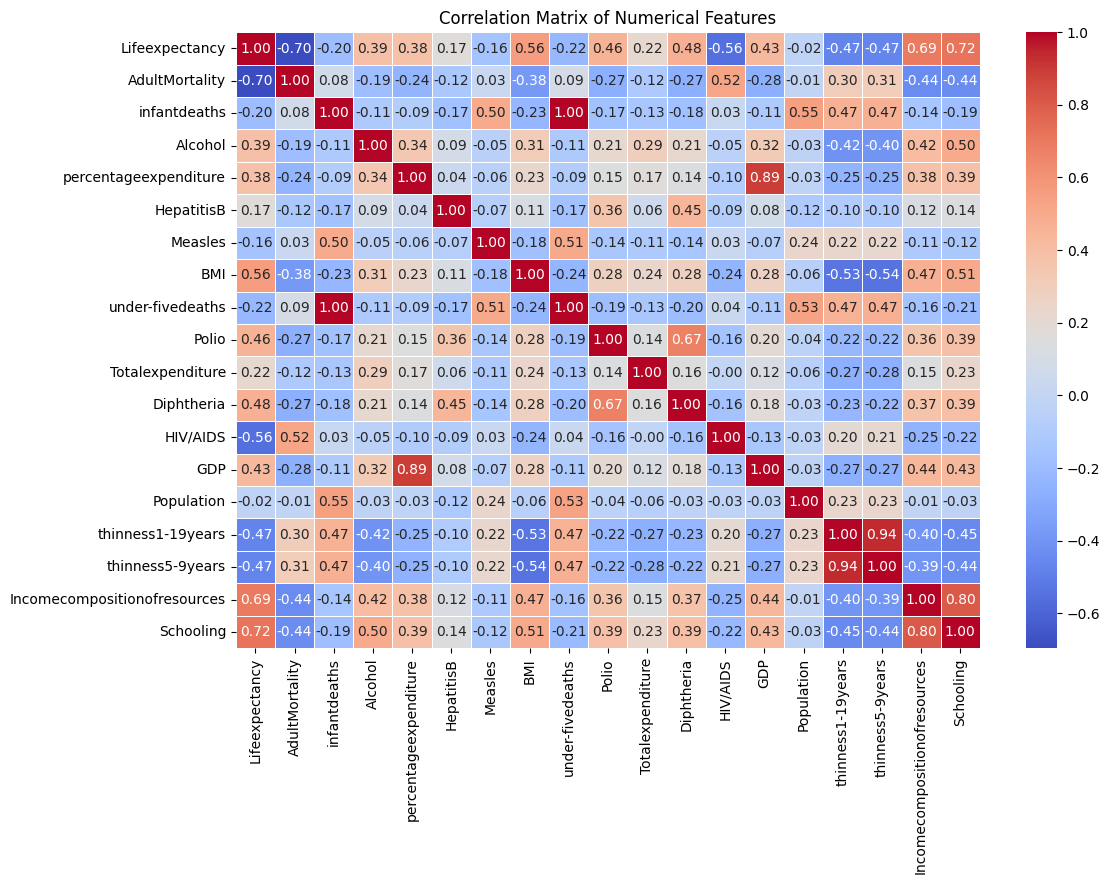

In [53]:
# Correlation matrix heatmap

# Select only numerical columns
numerical_data = life_expectancy.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Display the correlation matrix
print(correlation_matrix)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()



In [55]:
# Strip leading/trailing spaces from column names
life_expectancy.columns = life_expectancy.columns.str.strip()


In [56]:
# List all column names to check for extra spaces or unexpected characters
print(life_expectancy.columns)


Index(['Country', 'Year', 'Status', 'Lifeexpectancy', 'AdultMortality',
       'infantdeaths', 'Alcohol', 'percentageexpenditure', 'HepatitisB',
       'Measles', 'BMI', 'under-fivedeaths', 'Polio', 'Totalexpenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness1-19years',
       'thinness5-9years', 'Incomecompositionofresources', 'Schooling'],
      dtype='object')


In [58]:
# Select only numerical columns
numerical_data = life_expectancy.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Get the correlation of all features with 'Life expectancy'
life_expectancy_corr = correlation_matrix['Lifeexpectancy']

# Sort the correlations in descending order
life_expectancy_corr_sorted = life_expectancy_corr.sort_values(ascending=False)

# Display the sorted correlations
print(life_expectancy_corr_sorted)


Lifeexpectancy                  1.000000
Schooling                       0.715066
Incomecompositionofresources    0.690045
BMI                             0.559255
Diphtheria                      0.475888
Polio                           0.462140
GDP                             0.429998
Alcohol                         0.389847
percentageexpenditure           0.381791
Totalexpenditure                0.216349
HepatitisB                      0.170555
Population                     -0.020820
Measles                        -0.157574
infantdeaths                   -0.196535
under-fivedeaths               -0.222503
thinness5-9years               -0.466629
thinness1-19years              -0.472162
HIV/AIDS                       -0.556457
AdultMortality                 -0.696359
Name: Lifeexpectancy, dtype: float64


In [64]:
# Remove rows that are fully identical (all columns)
life_expectancy_clean = life_expectancy.drop_duplicates()

# Check the cleaned data
life_expectancy_clean.head()

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
0,Afghanistan,2015-01-01,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014-01-01,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013-01-01,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012-01-01,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011-01-01,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Data Analysis

##  Global life expectancy

In [68]:
# GeoJSON URL
url = "https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_50m_admin_0_countries.geojson"

# Load the GeoJSON data
gdf = gpd.read_file(url)

# Display some basic information
gdf


,scalerank,labelrank,sovereignt,sov_a3,adm0_dif,level,type,admin,adm0_a3,geou_dif,...,region_un,subregion,region_wb,name_len,long_len,abbrev_len,tiny,homepart,featureclass,geometry
0,3,5,Netherlands,NL1,1,2,Country,Aruba,ABW,0,...,Americas,Caribbean,Latin America & Caribbean,5,5,5,4,-99,Admin-0 country,"POLYGON ((-69.89912 12.452, -69.8957 12.423, -..."
1,1,3,Afghanistan,AFG,0,2,Sovereign country,Afghanistan,AFG,0,...,Asia,Southern Asia,South Asia,11,11,4,-99,1,Admin-0 country,"POLYGON ((74.89131 37.23164, 74.84023 37.22505..."
2,1,3,Angola,AGO,0,2,Sovereign country,Angola,AGO,0,...,Africa,Middle Africa,Sub-Saharan Africa,6,6,4,-99,1,Admin-0 country,"MULTIPOLYGON (((14.19082 -5.87598, 14.39863 -5..."
3,1,6,United Kingdom,GB1,1,2,Dependency,Anguilla,AIA,0,...,Americas,Caribbean,Latin America & Caribbean,8,8,4,-99,-99,Admin-0 country,"POLYGON ((-63.00122 18.22178, -63.16001 18.171..."
4,1,6,Albania,ALB,0,2,Sovereign country,Albania,ALB,0,...,Europe,Southern Europe,Europe & Central Asia,7,7,4,-99,1,Admin-0 country,"POLYGON ((20.06396 42.54727, 20.10352 42.52466..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,1,4,Samoa,WSM,0,2,Sovereign country,Samoa,WSM,0,...,Oceania,Polynesia,East Asia & Pacific,5,5,5,-99,1,Admin-0 country,"MULTIPOLYGON (((-171.4541 -14.04648, -171.7282..."
237,1,3,Yemen,YEM,0,2,Sovereign country,Yemen,YEM,0,...,Asia,Western Asia,Middle East & North Africa,5,5,4,-99,1,Admin-0 country,"MULTIPOLYGON (((53.76318 12.63682, 53.8248 12...."
238,1,2,South Africa,ZAF,0,2,Sovereign country,South Africa,ZAF,0,...,Africa,Southern Africa,Sub-Saharan Africa,12,12,5,-99,1,Admin-0 country,"MULTIPOLYGON (((37.85693 -46.94424, 37.81396 -..."
239,1,3,Zambia,ZMB,0,2,Sovereign country,Zambia,ZMB,0,...,Africa,Eastern Africa,Sub-Saharan Africa,6,6,6,-99,1,Admin-0 country,"POLYGON ((32.91992 -9.40742, 32.92334 -9.43398..."


In [69]:
life_expectancy2 = life_expectancy.merge(gdf, how='inner', right_on='admin', left_on='Country')

In [70]:
dropping = ['scalerank', 'labelrank',
       'sovereignt', 'sov_a3', 'adm0_dif', 'level', 'type', 'admin', 'adm0_a3',
       'geou_dif', 'geounit', 'gu_a3', 'su_dif', 'subunit', 'su_a3',
       'brk_diff', 'name', 'name_long', 'brk_a3', 'brk_name', 'brk_group',
       'abbrev', 'postal', 'formal_en', 'formal_fr', 'note_adm0', 'note_brk',
       'name_sort', 'name_alt', 'mapcolor7', 'mapcolor8', 'mapcolor9',
       'mapcolor13', 'pop_est', 'gdp_md_est', 'pop_year', 'lastcensus',
       'gdp_year', 'economy', 'income_grp', 'wikipedia', 'fips_10', 'iso_a2',
       'iso_a3', 'iso_n3', 'un_a3', 'wb_a2', 'wb_a3', 'woe_id', 'adm0_a3_is',
       'adm0_a3_us', 'adm0_a3_un', 'adm0_a3_wb', 'continent', 'region_un',
       'subregion', 'region_wb', 'name_len', 'long_len', 'abbrev_len', 'tiny',
       'homepart', 'featureclass']

life_expectancy2.drop(columns=dropping, inplace=True)

In [73]:
life_expectancy2 = gpd.GeoDataFrame(life_expectancy2, geometry='geometry')

In [76]:
#interactive choropleth map with Plotly
fig = px.choropleth(life_expectancy2,
                    locations='Country',  # Column with country names
                    locationmode='country names',  # Use country names for matching geometries
                    color='Lifeexpectancy',  # Column for life expectancy
                    hover_name='Country',  # Show country names on hover
                    color_continuous_scale='viridis',  # Color scale for life expectancy
                    title='Global Life Expectancy by Country')

# Show the interactive figure
fig.show()



In [80]:
# Sort by life expectancy to get the top 10
top_10_life_expectancy = life_expectancy[['Country', 'Lifeexpectancy']].sort_values(by='Lifeexpectancy', ascending=False).head(10)
print(top_10_life_expectancy)


          Country  Lifeexpectancy
1850  New Zealand            89.0
915       Finland            89.0
241       Belgium            89.0
2433        Spain            89.0
2513       Sweden            89.0
995       Germany            89.0
1916       Norway            89.0
2056     Portugal            89.0
1293        Italy            89.0
937        France            89.0


In [81]:
life_expectancy['Country']

,Country
0,Afghanistan
1,Afghanistan
2,Afghanistan
3,Afghanistan
4,Afghanistan
...,...
2933,Zimbabwe
2934,Zimbabwe
2935,Zimbabwe
2936,Zimbabwe


In [84]:
import pandas as pd

# Lists of countries for each continent
countries_by_continent = {
    'Africa': [
        'Algeria', 'Angola', 'Egypt', 'Kenya', 'Nigeria', 'South Africa', 'Burkina Faso', 'Burundi',
        'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Democratic Republic of the Congo',
        'Djibouti', 'Eritrea', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Lesotho',
        'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique',
        'Niger', 'Rwanda', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Sudan', 'Sudan', 'Togo',
        'Uganda', 'Zambia', 'Zimbabwe'
    ],
    'Asia': [
        'Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei Darussalam', 'Cambodia', 'China',
        'Cyprus', 'Georgia', 'India', 'Indonesia', 'Iran (Islamic Republic of)', 'Iraq', 'Israel', 'Japan', 'Jordan',
        'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Lao People\'s Democratic Republic', 'Lebanon', 'Malaysia', 'Maldives',
        'Mongolia', 'Myanmar', 'Nepal', 'Oman', 'Pakistan', 'Palau', 'Philippines', 'Qatar', 'Republic of Korea', 'Saudi Arabia',
        'Sri Lanka', 'Syrian Arab Republic', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates',
        'Uzbekistan', 'Viet Nam', 'Yemen'
    ],
    'Europe': [
        'Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia',
        'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia',
        'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia',
        'Norway', 'Poland', 'Portugal', 'Romania', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
        'Ukraine', 'United Kingdom of Great Britain and Northern Ireland'
    ],
    'North America': [
        'Canada', 'Mexico', 'United States of America'
    ],
    'South America': [
        'Argentina', 'Bolivia (Plurinational State of)', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname',
        'Trinidad and Tobago', 'Uruguay', 'Venezuela (Bolivarian Republic of)'
    ],
    'Oceania': [
        'Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia (Federated States of)', 'Nauru', 'New Zealand', 'Palau',
        'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu'
    ]
}

# Assuming life_expectancy is your dataframe containing 'Country', 'Happiness_Score', and 'Life_Expectancy'
# Create an empty dictionary to store results
continent_stats = {}

# Loop through each continent and calculate the average happiness score and life expectancy
for continent, countries in countries_by_continent.items():
    continent_data = life_expectancy[life_expectancy['Country'].isin(countries)]

    # Calculate the average happiness score and life expectancy
    avg_life_expectancy = continent_data['Lifeexpectancy'].mean()

    # Store the results in the dictionary
    continent_stats[continent] = {
        'Average Life Expectancy': avg_life_expectancy
    }

# Convert the results into a DataFrame for better visualization
continent_stats_df = pd.DataFrame(continent_stats).T
print(continent_stats_df)


               Average Life Expectancy
Africa                       58.623438
Asia                         71.008218
Europe                       77.895983
North America                78.489583
South America                72.825481
Oceania                      71.165852


               Average Life Expectancy
North America                78.489583
Europe                       77.895983
South America                72.825481
Oceania                      71.165852
Asia                         71.008218


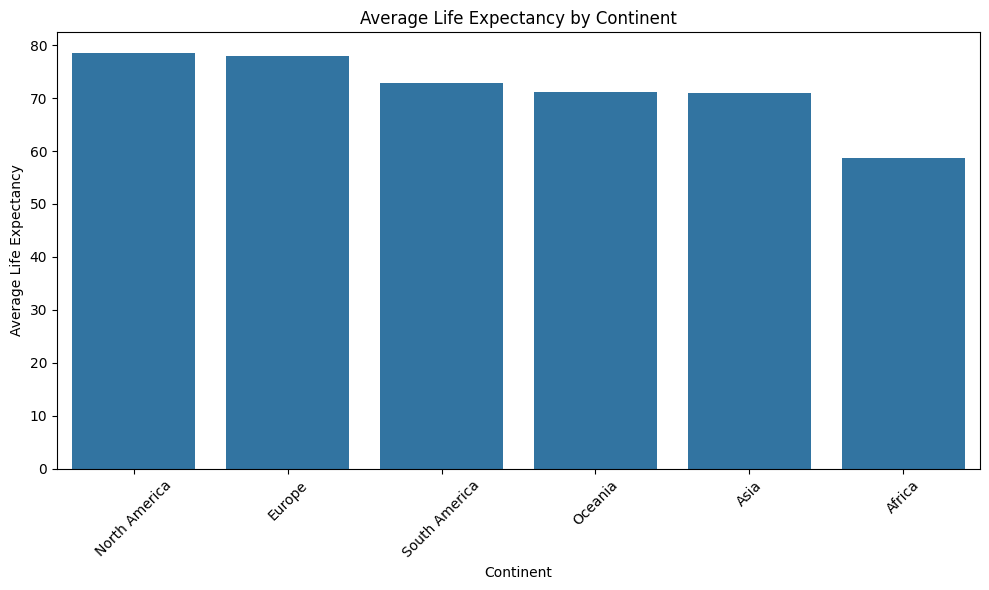

In [87]:
# Check the data to make sure it is in the correct format
print(continent_stats_df_sorted[['Average Life Expectancy']].head())

# Plot the data using a bar plot
plt.figure(figsize=(10, 6))

# Create a bar plot for life expectancy by continent
sns.barplot(x=continent_stats_df_sorted.index, y=continent_stats_df_sorted['Average Life Expectancy'])

# Set the title and labels
plt.title('Average Life Expectancy by Continent')
plt.xlabel('Continent')
plt.ylabel('Average Life Expectancy')

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()  # Ensure layout is adjusted to fit labels
plt.show()
